In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro , probplot
from scipy.stats import kruskal

In [2]:
from statsmodels.stats.stattools import durbin_watson
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
sales_data = pd.read_csv('Sales_Data.csv')

In [4]:
sales_data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [5]:
sales_data = sales_data.drop(columns = ['Unnamed: 0'])

In [6]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  int64  
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  int64  
 7   Sales             185950 non-null  float64
 8   City              185950 non-null  object 
 9   Hour              185950 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 14.2+ MB


In [7]:
sales_data.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64

In [8]:
sales_data.describe()

,Order ID,Quantity Ordered,Price Each,Month,Sales,Hour
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,230417.569379,1.124383,184.399735,7.059140,185.490917,14.413305
std,51512.737110,0.442793,332.731330,3.502996,332.919771,5.423416
min,141234.000000,1.000000,2.990000,1.000000,2.990000,0.000000
25%,185831.250000,1.000000,11.950000,4.000000,11.950000,11.000000
50%,230367.500000,1.000000,14.950000,7.000000,14.950000,15.000000
75%,275035.750000,1.000000,150.000000,10.000000,150.000000,19.000000
max,319670.000000,9.000000,1700.000000,12.000000,3400.000000,23.000000


# One-Sample T-Test

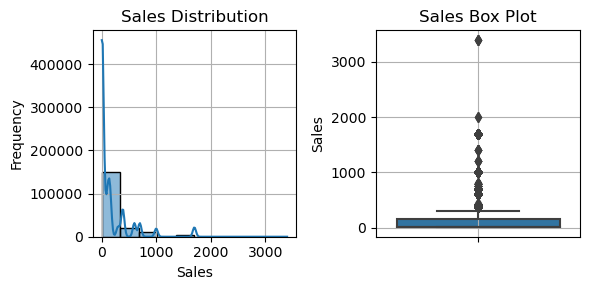

In [9]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(6, 3))

# Plot the histogram on the first subplot
sns.histplot(sales_data["Sales"], bins=10, kde=True, ax=axes[0])
axes[0].set_title('Sales Distribution')
axes[0].set_xlabel('Sales')
axes[0].set_ylabel('Frequency')
axes[0].grid(True)

# Plot the box plot on the second subplot
sns.boxplot(y=sales_data["Sales"], ax=axes[1])
axes[1].set_title('Sales Box Plot')
axes[1].set_ylabel('Sales')
axes[1].grid(True)

# Show the plots
plt.tight_layout()
plt.show()

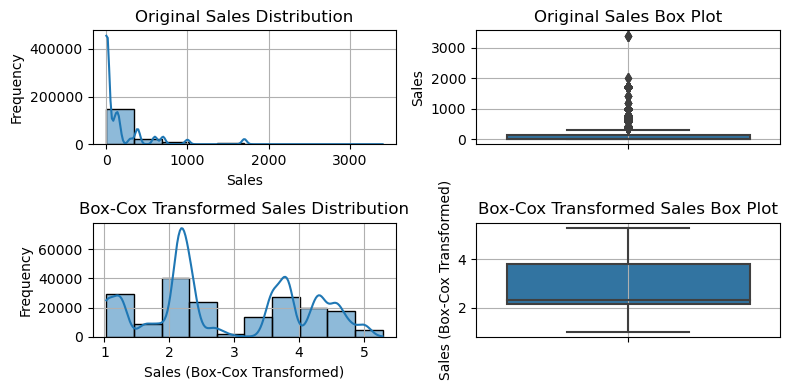

In [10]:
# Apply Box-Cox transformation
sales_boxcox, lamb = stats.boxcox(sales_data["Sales"])

# Add the transformed data back to the DataFrame
sales_data["Sales_BoxCox"] = sales_boxcox

# Plot the original and transformed data side by side
fig, axes = plt.subplots(2, 2, figsize=(8, 4))

# Original sales distribution
sns.histplot(sales_data["Sales"], bins=10, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Original Sales Distribution')
axes[0, 0].set_xlabel('Sales')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(True)

# Original sales box plot
sns.boxplot(y=sales_data["Sales"], ax=axes[0, 1])
axes[0, 1].set_title('Original Sales Box Plot')
axes[0, 1].set_ylabel('Sales')
axes[0, 1].grid(True)

# Transformed sales distribution
sns.histplot(sales_data["Sales_BoxCox"], bins=10, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Box-Cox Transformed Sales Distribution')
axes[1, 0].set_xlabel('Sales (Box-Cox Transformed)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].grid(True)

# Transformed sales box plot
sns.boxplot(y=sales_data["Sales_BoxCox"], ax=axes[1, 1])
axes[1, 1].set_title('Box-Cox Transformed Sales Box Plot')
axes[1, 1].set_ylabel('Sales (Box-Cox Transformed)')
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

Hypotheses:
    
    
   .Null Hypothesis (H0): The mean order amount is $3.
   
   .Alternative Hypothesis (H1): The mean order amount is not $3.

In [11]:
# Assume 'order_amount' column represents order amounts
order_amounts = sales_data['Sales_BoxCox']

# Perform one-sample t-test
t_stat, p_value = stats.ttest_1samp(order_amounts, 3)

t_stat, p_value

(-43.44496855477865, 0.0)

# Independent Two-Sample T-Test.

Hypotheses:
    
  .Null Hypothesis (H0): The mean order amount is the same for both cities.
    
  .Alternative Hypothesis (H1): The mean order amount is different for the two cities.

In [12]:
sales_data['City'] = sales_data['City'].str.strip()

In [13]:
# Filter the data for San Francisco and Los Angeles
filtered_sales_data = sales_data[sales_data['City'].isin(['San Francisco', 'Los Angeles'])]

In [14]:
filtered_sales_data['City'].value_counts()

City
San Francisco    44732
Los Angeles      29605
Name: count, dtype: int64

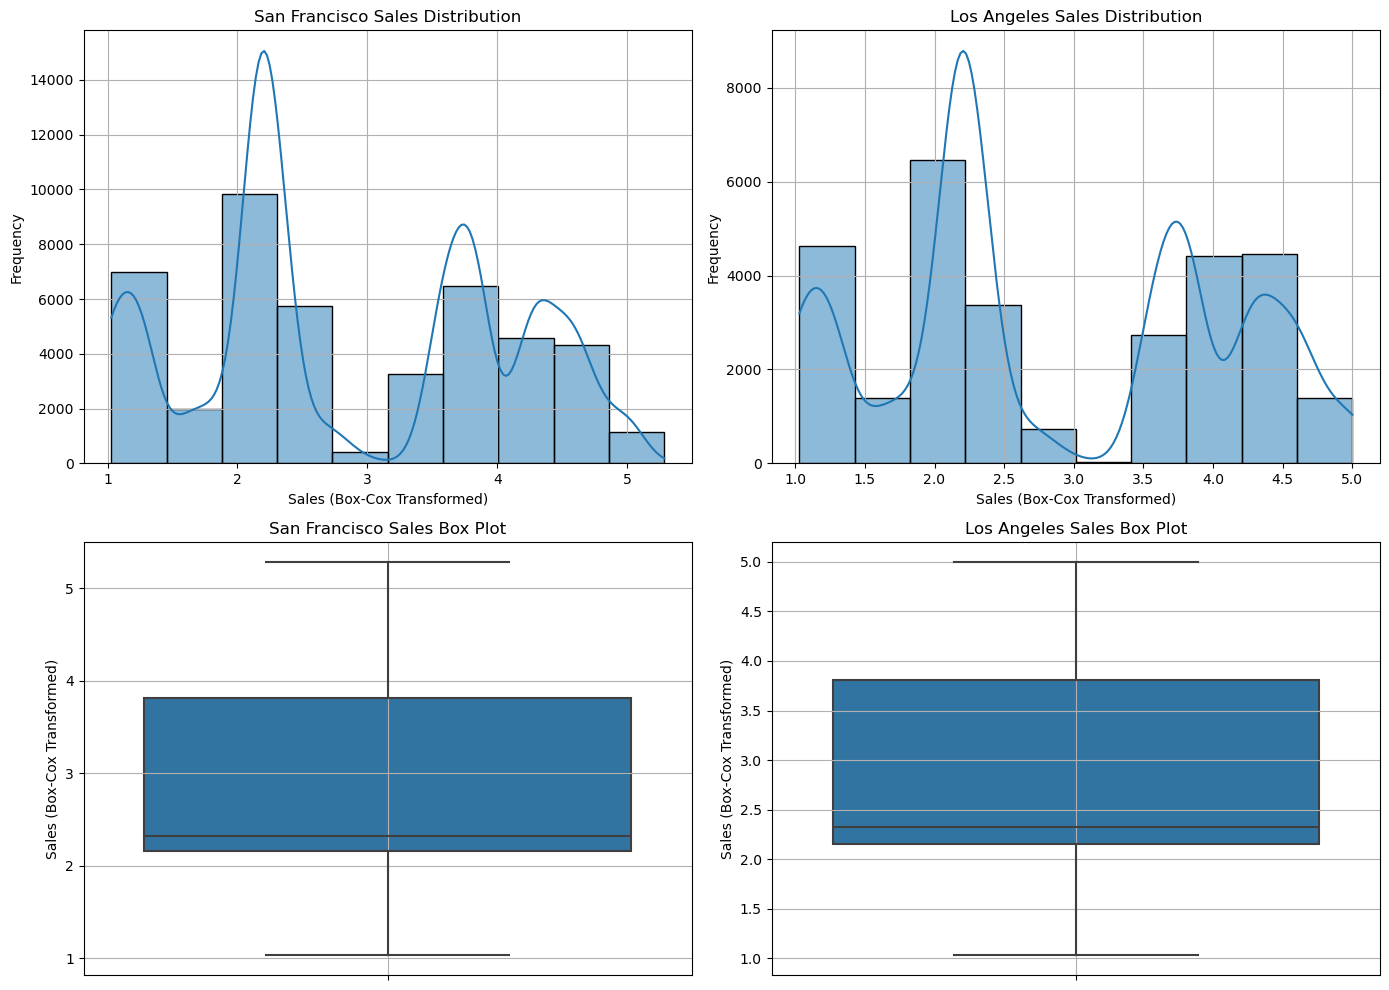

In [15]:
# Create a figure with four subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot histogram for San Francisco
sns.histplot(filtered_sales_data[filtered_sales_data['City'] == 'San Francisco']['Sales_BoxCox'], bins=10, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('San Francisco Sales Distribution')
axes[0, 0].set_xlabel('Sales (Box-Cox Transformed)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(True)

# Plot histogram for Los Angeles
sns.histplot(filtered_sales_data[filtered_sales_data['City'] == 'Los Angeles']['Sales_BoxCox'], bins=10, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Los Angeles Sales Distribution')
axes[0, 1].set_xlabel('Sales (Box-Cox Transformed)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].grid(True)

# Plot box plot for San Francisco
sns.boxplot(y=filtered_sales_data[filtered_sales_data['City'] == 'San Francisco']['Sales_BoxCox'], ax=axes[1, 0])
axes[1, 0].set_title('San Francisco Sales Box Plot')
axes[1, 0].set_ylabel('Sales (Box-Cox Transformed)')
axes[1, 0].grid(True)

# Plot box plot for Los Angeles
sns.boxplot(y=filtered_sales_data[filtered_sales_data['City'] == 'Los Angeles']['Sales_BoxCox'], ax=axes[1, 1])
axes[1, 1].set_title('Los Angeles Sales Box Plot')
axes[1, 1].set_ylabel('Sales (Box-Cox Transformed)')
axes[1, 1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

In [16]:
# Separate the data for the two cities
sf_sales = filtered_sales_data[filtered_sales_data['City'] == 'San Francisco']['Sales_BoxCox']
la_sales = filtered_sales_data[filtered_sales_data['City'] == 'Los Angeles']['Sales_BoxCox']

# Calculate the variance of the Box-Cox transformed sales data for both cities
sf_variance = sf_sales.var()
la_variance = la_sales.var()

sf_variance, la_variance

(1.4456874523514665, 1.448390160421431)

In [17]:
# Perform the t-test
t_stat, p_value = stats.ttest_ind(sf_sales, la_sales, equal_var=True)  # Use equal_var=False if variances are unequal

# Print the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 0.7069895386449557
P-value: 0.47957519509149105


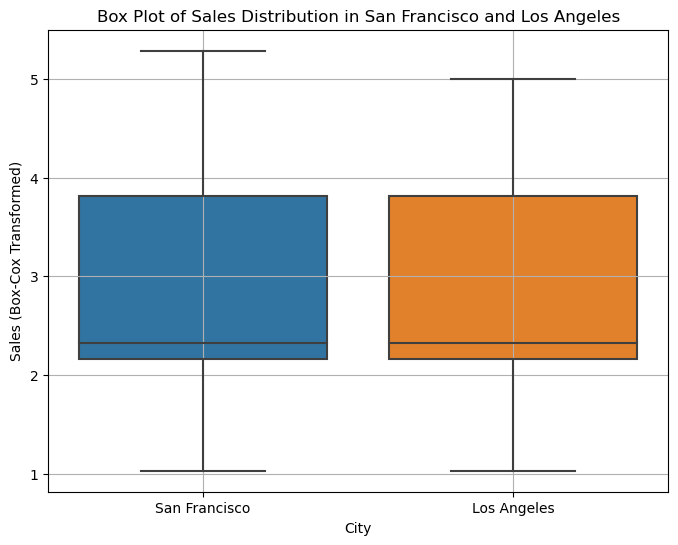

In [18]:
# Plotting the histogram for Sales using seaborn
plt.figure(figsize=(8, 6))  # Increased size for better visibility
sns.boxplot(x='City', y='Sales_BoxCox', data=filtered_sales_data)
plt.title('Box Plot of Sales Distribution in San Francisco and Los Angeles')
plt.xlabel('City')
plt.ylabel('Sales (Box-Cox Transformed)')
plt.grid(True)
plt.show()

# Verifying the asssumptions of Annova

In [19]:
# Filter the data for San Francisco, Los Angeles, and New York City
filtered_sales_data = sales_data[sales_data['City'].isin(['San Francisco', 'Los Angeles', 'New York City'])]

In [20]:
filtered_sales_data['City'].value_counts()

City
San Francisco    44732
Los Angeles      29605
New York City    24876
Name: count, dtype: int64

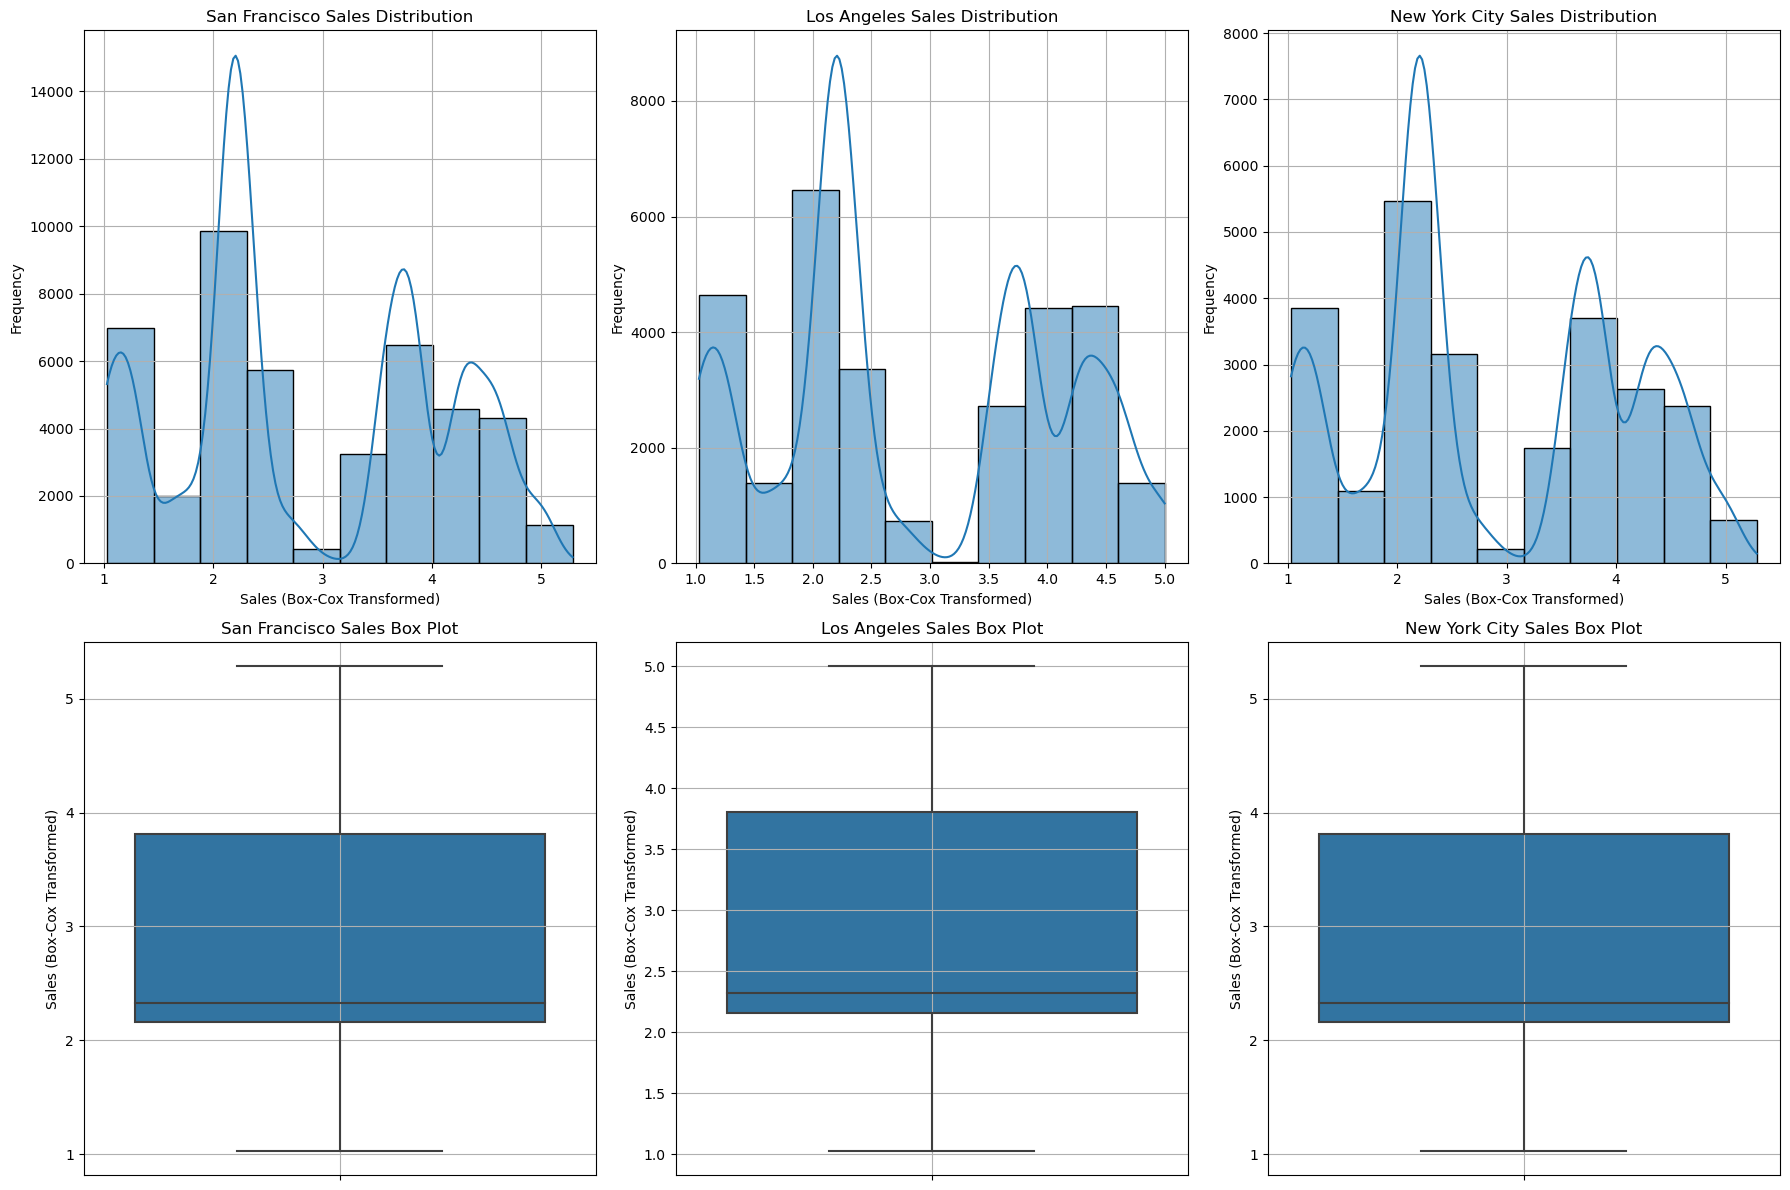

In [21]:
# Create a figure with six subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plot histogram for San Francisco
sns.histplot(filtered_sales_data[filtered_sales_data['City'] == 'San Francisco']['Sales_BoxCox'], bins=10, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('San Francisco Sales Distribution')
axes[0, 0].set_xlabel('Sales (Box-Cox Transformed)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(True)

# Plot histogram for Los Angeles
sns.histplot(filtered_sales_data[filtered_sales_data['City'] == 'Los Angeles']['Sales_BoxCox'], bins=10, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Los Angeles Sales Distribution')
axes[0, 1].set_xlabel('Sales (Box-Cox Transformed)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].grid(True)

# Plot histogram for New York City
sns.histplot(filtered_sales_data[filtered_sales_data['City'] == 'New York City']['Sales_BoxCox'], bins=10, kde=True, ax=axes[0, 2])
axes[0, 2].set_title('New York City Sales Distribution')
axes[0, 2].set_xlabel('Sales (Box-Cox Transformed)')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].grid(True)

# Plot box plot for San Francisco
sns.boxplot(y=filtered_sales_data[filtered_sales_data['City'] == 'San Francisco']['Sales_BoxCox'], ax=axes[1, 0])
axes[1, 0].set_title('San Francisco Sales Box Plot')
axes[1, 0].set_ylabel('Sales (Box-Cox Transformed)')
axes[1, 0].grid(True)

# Plot box plot for Los Angeles
sns.boxplot(y=filtered_sales_data[filtered_sales_data['City'] == 'Los Angeles']['Sales_BoxCox'], ax=axes[1, 1])
axes[1, 1].set_title('Los Angeles Sales Box Plot')
axes[1, 1].set_ylabel('Sales (Box-Cox Transformed)')
axes[1, 1].grid(True)

# Plot box plot for New York City
sns.boxplot(y=filtered_sales_data[filtered_sales_data['City'] == 'New York City']['Sales_BoxCox'], ax=axes[1, 2])
axes[1, 2].set_title('New York City Sales Box Plot')
axes[1, 2].set_ylabel('Sales (Box-Cox Transformed)')
axes[1, 2].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

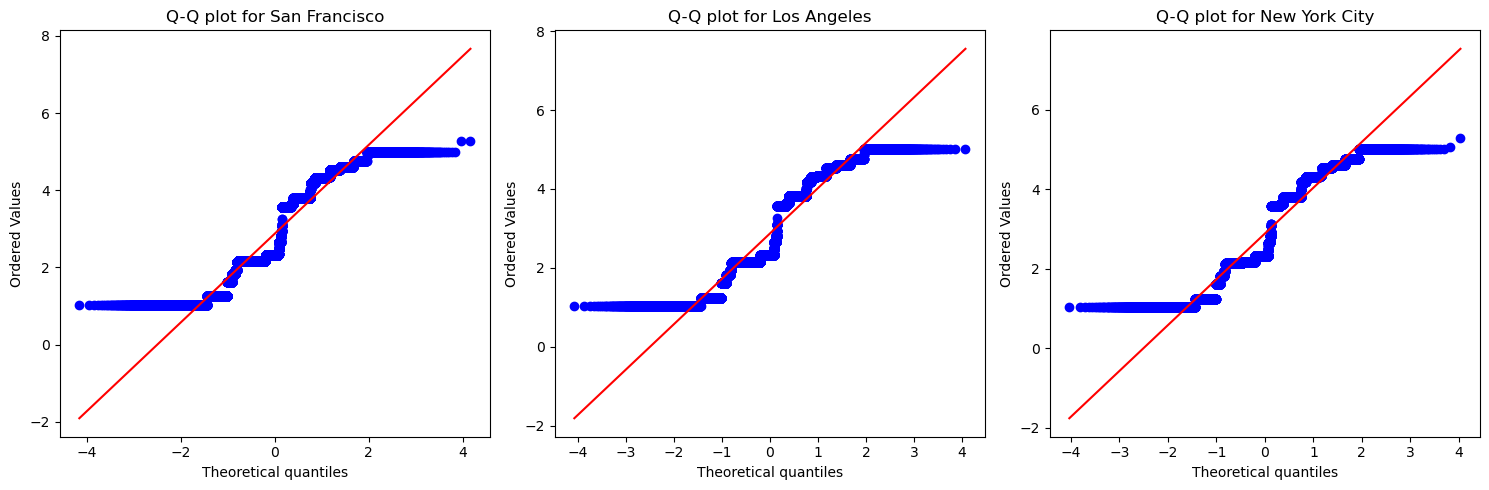

Group San Francisco Shapiro-Wilk test statistic: 0.9132262468338013, p-value: 0.0
Group Los Angeles Shapiro-Wilk test statistic: 0.912886917591095, p-value: 0.0
Group New York City Shapiro-Wilk test statistic: 0.9130082726478577, p-value: 0.0


C:\Users\harib\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [22]:
# Groups to plot
groups = ['San Francisco', 'Los Angeles', 'New York City']

# Create subplots
fig, axes = plt.subplots(1, len(groups), figsize=(15, 5))

# Generate Q-Q plots for each group
for i, group in enumerate(groups):
    probplot(filtered_sales_data[filtered_sales_data['City'] == group]['Sales_BoxCox'], dist="norm", plot=axes[i])
    axes[i].set_title(f'Q-Q plot for {group}')

plt.tight_layout()
plt.show()

# Shapiro-Wilk test for normality
for group in groups:
    stat, p = shapiro(filtered_sales_data[filtered_sales_data['City'] == group]['Sales_BoxCox'])
    print(f'Group {group} Shapiro-Wilk test statistic: {stat}, p-value: {p}')

In [23]:
# Perform Levene's test for homogeneity of variances
stat , p = stats.levene(
    filtered_sales_data[filtered_sales_data['City'] == 'San Francisco']['Sales_BoxCox'],
    filtered_sales_data[filtered_sales_data['City'] == 'Los Angeles']['Sales_BoxCox'],
    filtered_sales_data[filtered_sales_data['City'] == 'New York City']['Sales_BoxCox']
)

print(f"Levene's test statistic: {stat}, p-value: {p}")


Levene's test statistic: 1.0330186930625034, p-value: 0.3559347195708925


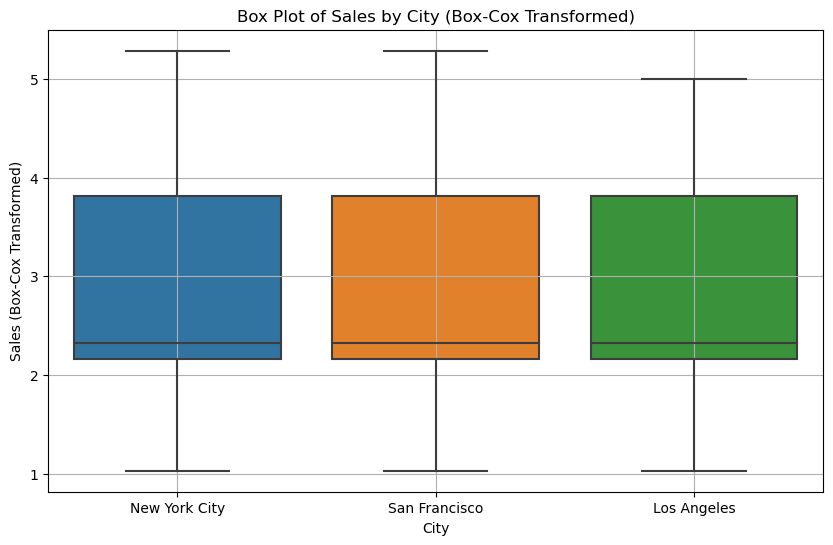

In [24]:
# Check homogeneity of variances using box plots
plt.figure(figsize=(10, 6))  # Adjusted size for better visibility
sns.boxplot(x='City', y='Sales_BoxCox', data=filtered_sales_data)
plt.title('Box Plot of Sales by City (Box-Cox Transformed)')
plt.xlabel('City')
plt.ylabel('Sales (Box-Cox Transformed)')
plt.grid(True)  # Optional: Adds a grid for better readability
plt.show()


# Observations from the Box Plot:
Interquartile Range (IQR): The IQR (box height) for the three cities (New York City, San Francisco, and Los Angeles) appear to be quite similar. This suggests that the central spread of the data is similar across groups.


Whiskers: The whiskers (range) for the three cities also appear to be of similar length, indicating that the overall spread of the data is consistent across the groups.

# Conclusion
The variances of the Box-Cox transformed sales data for San Francisco, Los Angeles, and New York City are statistically similar. This indicates that the assumption of homogeneity of variances required for ANOVA is satisfied.

# Next Steps
Given that:

Homogeneity of variances: The assumption is satisfied (based on Levene's test).

Normality: There are some deviations, but ANOVA is robust to deviations from normality with large sample sizes.

You can proceed with performing ANOVA to compare the means of the three groups.

In [25]:
# Perform ANOVA
model = ols('Sales_BoxCox ~ City', data=filtered_sales_data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                 sum_sq       df         F    PR(>F)
City           3.825782      2.0  1.320872  0.266907
Residual  143676.272811  99210.0       NaN       NaN


# Conclusion:
No Significant Difference: There is no statistically significant difference in the means of the Box-Cox transformed sales data between the three cities (New York City, San Francisco, and Los Angeles).
Implication: The sales data, after Box-Cox transformation, do not show significant variation in average sales among the three cities.

# Linear Regression

In [26]:
# Filter the relevant columns
filtered_sales_data = sales_data[['Quantity Ordered', 'Price Each', 'Month', 'Sales_BoxCox', 'Hour','City']]
# Apply Box-Cox transformation
PriceEach_boxcox, lamb = stats.boxcox(filtered_sales_data['Price Each'])

# Add the transformed data back to the DataFrame
filtered_sales_data['Price Each_BoxCox'] = PriceEach_boxcox
# One-hot encode the 'City' variable for visualization
filtered_sales_data = pd.get_dummies(filtered_sales_data, columns=['City'], drop_first=True)


C:\Users\harib\AppData\Local\Temp\ipykernel_10252\1454373880.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_sales_data['Price Each_BoxCox'] = PriceEach_boxcox


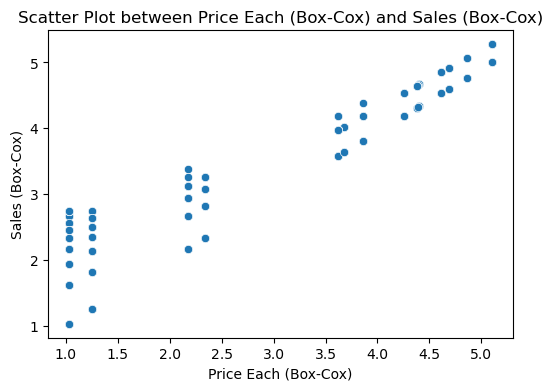

In [28]:
plt.figure(figsize = (6,4))
# Creating the scatter plot
sns.scatterplot(x='Price Each_BoxCox', y='Sales_BoxCox', data=filtered_sales_data)

# Adding titles and labels
plt.title('Scatter Plot between Price Each (Box-Cox) and Sales (Box-Cox)')
plt.xlabel('Price Each (Box-Cox)')
plt.ylabel('Sales (Box-Cox)')

# Show plot
plt.show()

In [29]:
filtered_sales_data.head()

,Quantity Ordered,Price Each,Month,Sales_BoxCox,Hour,Price Each_BoxCox,City_Austin,City_Boston,City_Dallas,City_Los Angeles,City_New York City,City_Portland,City_San Francisco,City_Seattle
0,1,1700.00,12,5.001446,0,5.102651,False,False,False,False,True,False,False,False
1,1,600.00,12,4.530629,7,4.611094,False,False,False,False,True,False,False,False
2,1,11.95,12,2.158635,18,2.174633,False,False,False,False,True,False,False,False
3,1,149.99,12,3.809794,15,3.864219,False,False,False,False,False,False,True,False
4,1,11.95,12,2.158635,12,2.174633,False,False,False,False,False,False,False,False


In [30]:
filtered_sales_data = filtered_sales_data.astype(float)

In [31]:
# Define the target variable and feature variables
X = filtered_sales_data.drop(columns = ['Sales_BoxCox' , 'Price Each'], axis=1)
y = filtered_sales_data['Sales_BoxCox']

In [ ]:
# Add a constant to the model (intercept)
#X = sm.add_constant(X)

In [32]:
# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:           Sales_BoxCox   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          2.838e+07
Date:                Sat, 10 Aug 2024   Prob (F-statistic):                        0.00
Time:                        11:16:20   Log-Likelihood:                      2.2311e+05
No. Observations:              185950   AIC:                                 -4.462e+05
Df Residuals:                  185938   BIC:                                 -4.461e+05
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [33]:
# Durbin-Watson test
dw = durbin_watson(model.resid)
print(f'Durbin-Watson statistic: {dw}')

Durbin-Watson statistic: 1.8208791049071098


In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

               feature       VIF
0     Quantity Ordered  5.883772
1                Month  4.545983
2                 Hour  6.638280
3    Price Each_BoxCox  4.896192
4          City_Austin  1.458786
5          City_Boston  1.929336
6          City_Dallas  1.691267
7     City_Los Angeles  2.373116
8   City_New York City  2.155511
9        City_Portland  1.579520
10  City_San Francisco  3.073175
11        City_Seattle  1.689176


In [35]:
filtered_sales_data = filtered_sales_data.drop(columns = ['Price Each'], axis=1)

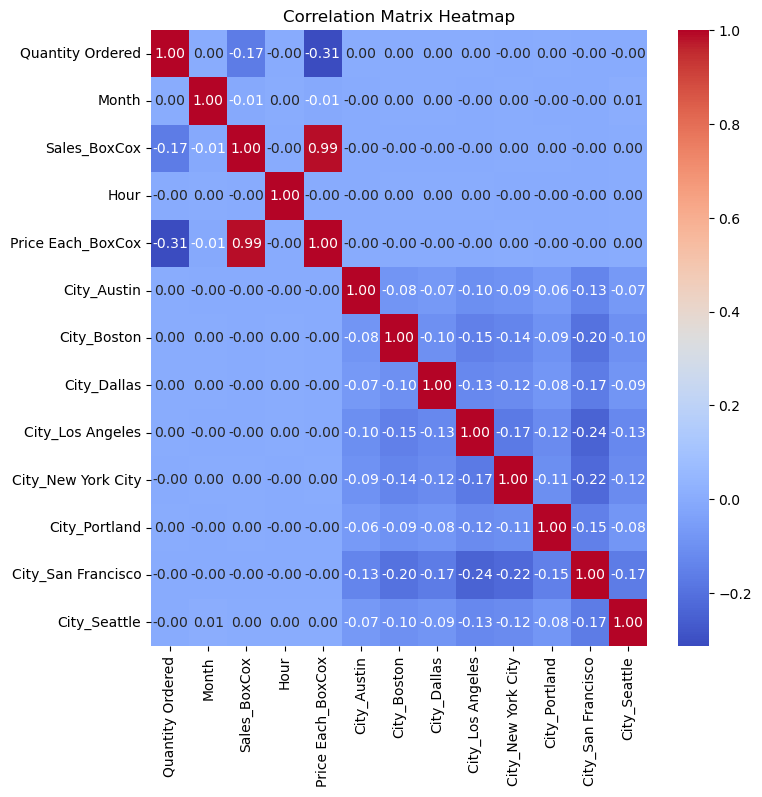

In [36]:

# Calculate the correlation matrix
corr_matrix = filtered_sales_data.corr()

# Create a heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

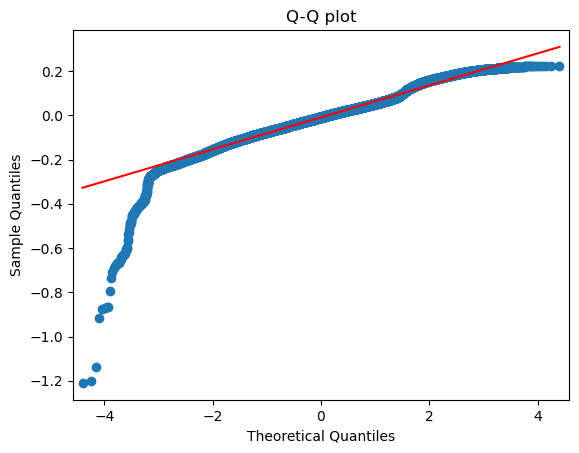

Shapiro-Wilk test statistic: 0.9800027012825012, p-value: 0.0


C:\Users\harib\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [37]:
# Q-Q plot for residuals
sm.qqplot(model.resid, line='s')
plt.title('Q-Q plot')
plt.show()

# Shapiro-Wilk test for normality
from scipy.stats import shapiro
shapiro_test = shapiro(model.resid)
print(f'Shapiro-Wilk test statistic: {shapiro_test[0]}, p-value: {shapiro_test[1]}')

# Random Forest Model

In [38]:
# Filter the relevant columns
filtered_sales_data = sales_data[['Quantity Ordered', 'Price Each', 'Month', 'Sales', 'Hour','City']]

In [39]:


# Assume 'df' is your DataFrame and 'City' is a categorical column
filtered_sales_data = pd.get_dummies(filtered_sales_data, columns=['City'], drop_first=True)


In [40]:
X = filtered_sales_data.drop(columns=['Sales'])  # Features
y = filtered_sales_data['Sales']  # Target


Mean Squared Error: 0.5949469913964327
R-squared: 0.9999946721593113


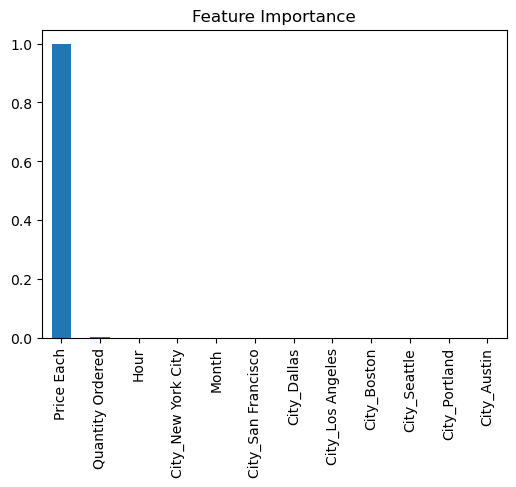

In [41]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Feature importance
importances = model.feature_importances_
feature_importances = pd.Series(importances, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(6, 4))
plt.title('Feature Importance')
plt.show()
